In [1]:
load( url("https://cbail.github.io/Trump_Tweets.Rdata") )
library(tidytext)
library(dplyr)
tidy_trump_tweets<- trumptweets %>%
    select(created_at,text) %>%
    unnest_tokens("word", text)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data("stop_words")
tidy_trump_tweets<-tidy_trump_tweets %>%
      anti_join(stop_words)

tidy_trump_tweets<-tidy_trump_tweets[-grep("\\b\\d+\\b", tidy_trump_tweets$word),]
tidy_trump_tweets$word <- gsub("\\s+","",tidy_trump_tweets$word)

library(SnowballC)
  tidy_trump_tweets<-tidy_trump_tweets %>%
      mutate_at("word", funs(wordStem((.), language="en")))

Joining, by = "word"


## What are the most common words?

Joining, by = "word"


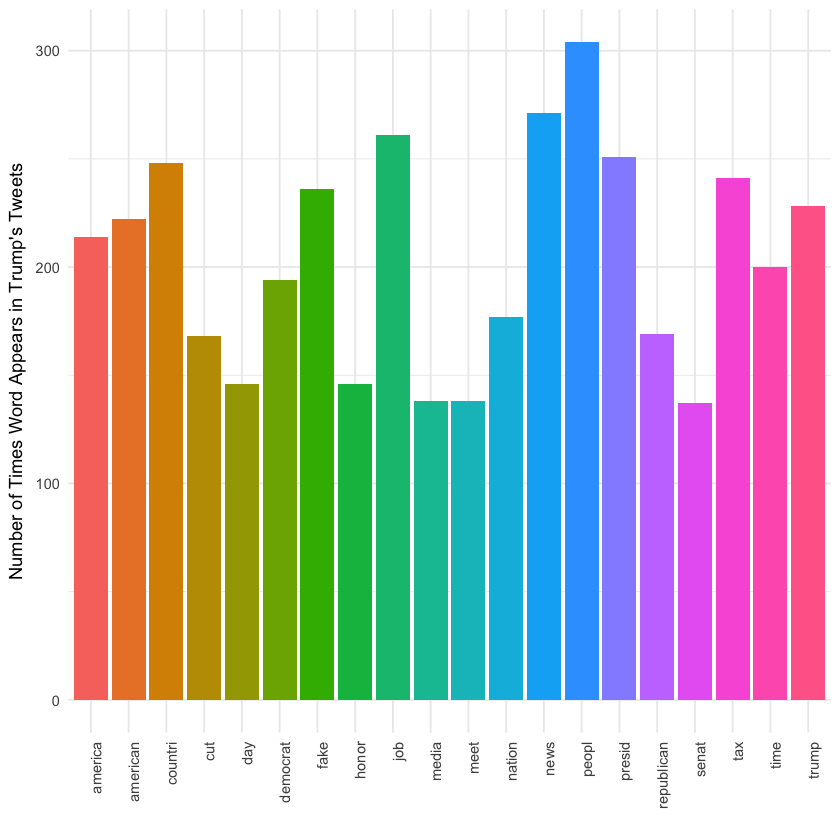

In [3]:
trump_tweet_top_words<-
   tidy_trump_tweets %>%
      anti_join(stop_words) %>%
        count(word) %>%
        arrange(desc(n))

trump_tweet_top_words<-
  trump_tweet_top_words[-grep("https|t.co|amp|rt",
                              trump_tweet_top_words$word),]

#select only top words
top_20<-trump_tweet_top_words[1:20,]

#create factor variable to sort by frequency
trump_tweet_top_words$word <- factor(trump_tweet_top_words$word, levels = trump_tweet_top_words$word[order(trump_tweet_top_words$n,decreasing=TRUE)])


library(ggplot2)
ggplot(top_20, aes(x=word, y=n, fill=word))+
  geom_bar(stat="identity")+
  theme_minimal()+
  theme(axis.text.x = element_text(angle = 90, hjust = 1))+
  ylab("Number of Times Word Appears in Trump's Tweets")+
  xlab("")+
  guides(fill=FALSE)

## Dictonary based approach

In [6]:
economic_dictionary<-c("economy","unemployment","trade","tariffs")

library(stringr)
economic_tweets<-trumptweets[str_detect(trumptweets$text, economic_dictionary),]
head(economic_tweets$text)

dim( economic_tweets )

table( economic_tweets$source )

[1] "Great talk with my friend President Mauricio Macri of Argentina this week. He is doing such a good job for Argentina. I support his vision for transforming his country’s economy and unleashing its potential!"                                                                             
[2] "The Washington Post and CNN have typically written false stories about our trade negotiations with China. Nothing has happened with ZTE except as it pertains to the larger trade deal. Our country has been losing hundreds of billions of dollars a year with China..."                    
[3] "China and the United States are working well together on trade, but past negotiations have been so one sided in favor of China, for so many years, that it is hard for them to make a deal that benefits both countries. But be cool, it will all work out!"                                 
[4] "The Fake News is working overtime. Just reported that, despite the tremendous success we are having with the economy &amp; all things else, 91% of the Network News about me is negative (Fake). Why do we work so hard in working with the media when it is corrupt? Take away credentials?"
[5] "Looking forward to my meeting with Tim Cook of Apple. We will be talking about many things, including how the U.S. has been treated unfairly for many years, by many countries, on trade."                                                                                                   
[6] "So much Fake News about what is going on in the White House. Very calm and calculated with a big focus on open and fair trade with China, the coming North Korea meeting and, of course, the vicious gas attack in Syria. Feels great to have Bolton &amp; Larry K on board. I (we) are"

[1] 42 42


      Media Studio Twitter Web Client Twitter for iPhone 
                 2                  2                 38 

## Sentiment analysis

In [7]:
head( get_sentiments("bing") )

word,sentiment
2-faced,negative
2-faces,negative
a+,positive
abnormal,negative
abolish,negative
abominable,negative


In [8]:
trump_tweet_sentiment <- tidy_trump_tweets %>%
  inner_join(get_sentiments("bing")) %>%
    count(created_at, sentiment) 

head(trump_tweet_sentiment)

Joining, by = "word"


created_at,sentiment,n
2017-02-05 22:49:42,positive,1
2017-02-06 03:36:54,positive,4
2017-02-06 12:01:53,negative,1
2017-02-06 12:07:55,negative,2
2017-02-06 16:32:24,negative,3
2017-02-06 23:33:52,positive,2


Joining, by = "word"


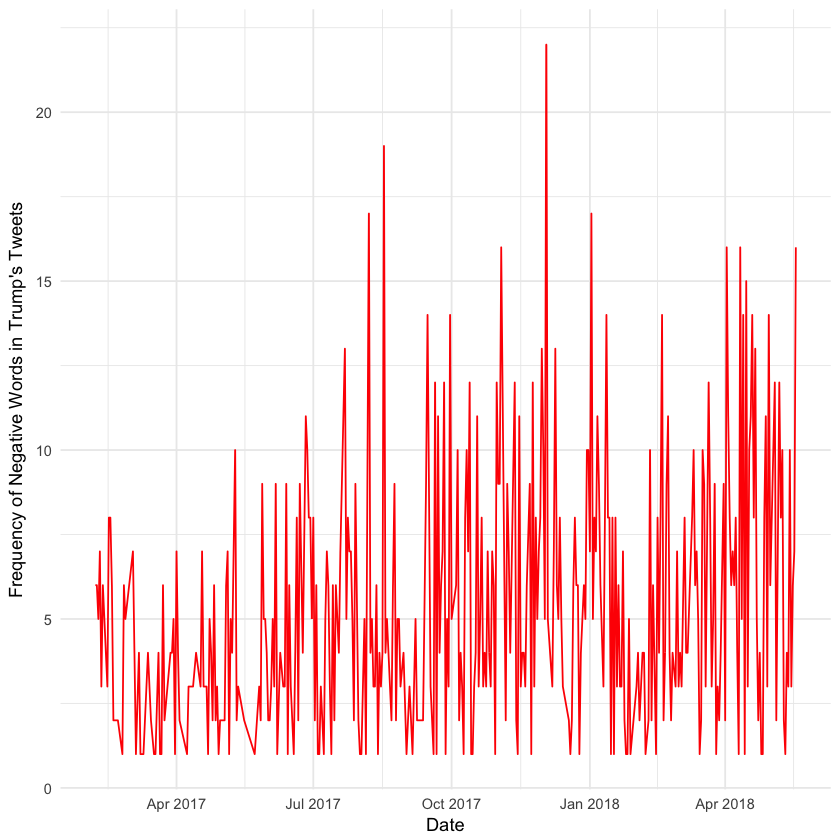

In [9]:
tidy_trump_tweets$date<-as.Date(tidy_trump_tweets$created_at, 
                                          format="%Y-%m-%d %x")
trump_sentiment_plot <-
  tidy_trump_tweets %>%
    inner_join(get_sentiments("bing")) %>% 
      filter(sentiment=="negative") %>%
          count(date, sentiment)

library(ggplot2)

ggplot(trump_sentiment_plot, aes(x=date, y=n))+
  geom_line(color="red")+
    theme_minimal()+
      ylab("Frequency of Negative Words in Trump's Tweets")+
        xlab("Date")

In [10]:
library(stm)

stm v1.3.3 (2018-1-26) successfully loaded. See ?stm for help. 
 Papers, resources, and other materials at structuraltopicmodel.com


In [11]:
head( trumptweets )

status_id,created_at,user_id,screen_name,text,source,reply_to_status_id,reply_to_user_id,reply_to_screen_name,is_quote,⋯,retweet_text,place_url,place_name,place_full_name,place_type,country,country_code,geo_coords,coords_coords,bbox_coords
997577906007298048,2018-05-18 20:41:21,25073877,realDonaldTrump,"Just met with UN Secretary-General António Guterres who is working hard to “Make the United Nations Great Again.” When the UN does more to solve conflicts around the world, it means the U.S. has less to do and we save money. @NikkiHaley is doing a fantastic job! https://t.co/pqUv6cyH2z",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997573139663028224,2018-05-18 20:22:25,25073877,realDonaldTrump,America is a Nation that believes in the power of redemption. America is a Nation that believes in second chances - and America is a Nation that believes that the best is always yet to come! #PrisonReform https://t.co/Yk5UJUYgHN,Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997568208369577985,2018-05-18 20:02:49,25073877,realDonaldTrump,RT @SteveForbesCEO: .@realDonaldTrump speech on drug costs pays immediate dividends. New @Amgen drug lists at 30% less than expected. Middl…,Twitter for iPhone,NA,NA,NA,FALSE,⋯,".@realDonaldTrump speech on drug costs pays immediate dividends. New @Amgen drug lists at 30% less than expected. Middlemen like Pharmacy Benefit Managers, insurers &amp; hospitals would do well by passing discounts on to patients. @SecAzar @SGottliebFDA https://t.co/mfRQ5COtev",NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997515759281680385,2018-05-18 16:34:24,25073877,realDonaldTrump,"We grieve for the terrible loss of life, and send our support and love to everyone affected by this horrible attack in Texas. To the students, families, teachers and personnel at Santa Fe High School – we are with you in this tragic hour, and we will be with you forever... https://t.co/LtJ0D29Hsv",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997493407097524224,2018-05-18 15:05:35,25073877,realDonaldTrump,School shooting in Texas. Early reports not looking good. God bless all!,Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"
997474432443707393,2018-05-18 13:50:11,25073877,realDonaldTrump,"Reports are there was indeed at least one FBI representative implanted, for political purposes, into my campaign for president. It took place very early on, and long before the phony Russia Hoax became a “hot” Fake News story. If true - all time biggest political scandal!",Twitter for iPhone,NA,NA,NA,FALSE,⋯,NA,NA,NA,NA,NA,NA,NA,"NA, NA","NA, NA","NA, NA, NA, NA, NA, NA, NA, NA"


In [12]:
processed <- textProcessor( trumptweets$text, metadata = trumptweets )

Building corpus... 
Converting to Lower Case... 
Removing punctuation... 
Removing stopwords... 
Removing numbers... 
Stemming... 
Creating Output... 


In [13]:
out <- prepDocuments(processed$documents, processed$vocab, processed$meta)

Removing 3940 of 6884 terms (3940 of 43407 tokens) due to frequency 
Removing 8 Documents with No Words 
Your corpus now has 3188 documents, 2944 terms and 39467 tokens.

In [18]:
model <- stm(documents = out$documents, vocab = out$vocab,
              K = 0,
              max.em.its = 75, data = out$meta,
              init.type = "Spectral", verbose = FALSE)

Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 41: good, usa🇺🇸, god' in 'mbcsToSbcs': dot substituted for <f0>”Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 41: good, usa🇺🇸, god' in 'mbcsToSbcs': dot substituted for <9f>”Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 41: good, usa🇺🇸, god' in 'mbcsToSbcs': dot substituted for <87>”Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 41: good, usa🇺🇸, god' in 'mbcsToSbcs': dot substituted for <ba>”Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 41: good, usa🇺🇸, god' in 'mbcsToSbcs': dot substituted for <f0>”Warning message in text.default(frequency[invrank[i]] + min(2 * max(frequency), :
“conversion failure on 'Topic 41: good

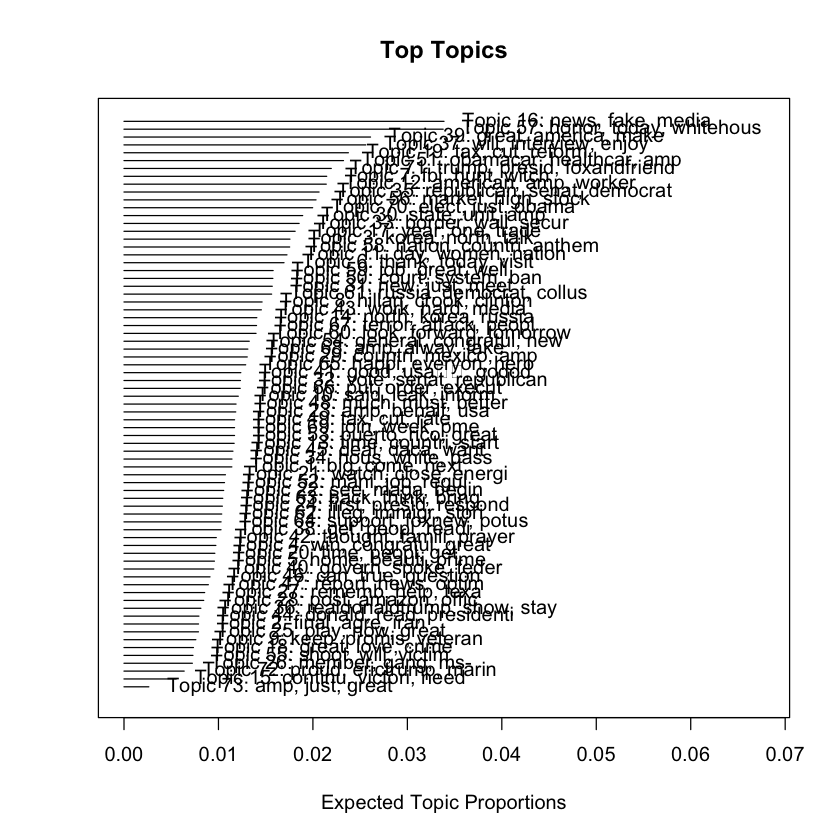

In [19]:
plot( model )

In [16]:
predict_topics<-estimateEffect(formula = 1 ~ source, stmobj =  model, metadata = out$meta, uncertainty = "Global")

In [17]:
summary(predict_topics )


Call:
estimateEffect(formula = 1 ~ source, stmobj = model, metadata = out$meta, 
    uncertainty = "Global")


Topic 1:

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.109636   0.010206  10.742   <2e-16 ***
sourceTwitter Ads          0.044412   0.023763   1.869   0.0617 .  
sourceTwitter Web Client   0.001016   0.020402   0.050   0.9603    
sourceTwitter for Android -0.029716   0.014246  -2.086   0.0371 *  
sourceTwitter for iPad    -0.009645   0.020586  -0.469   0.6394    
sourceTwitter for iPhone  -0.009738   0.010548  -0.923   0.3560    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
